In [131]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization

In [201]:


# Paths to datasets
train_dir = 'C:/Users/hassan/OneDrive/Documents/S9/Deep Learning/Final Project/data/Resized_Train'
val_dir = 'data/Resized_Val'
test_dir = 'C:/Users/hassan/OneDrive/Documents/S9/Deep Learning/Final Project/data/Resized_Test'

# Data generators with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # Réduire à 10 degrés
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


# Validation and test generators (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images to match your model input
    batch_size=32,          # Number of images per batch
    class_mode='categorical'  # Multi-class classification
)

# Load validation data
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Do not shuffle for test data (important for evaluation)
)


Found 1218 images belonging to 7 classes.
Found 1174 images belonging to 7 classes.
Found 70 images belonging to 7 classes.


In [202]:
model = Sequential([
  
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(256, (3, 3), activation='relu'),  
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),  
    Dropout(0.5),                   
    Dense(64, activation='relu'),   

    
    Dense(7, activation='softmax')  
])

model.summary()


c:\Users\hassan\OneDrive\Documents\S9\Deep Learning\Final Project\DL\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_65 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_68 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,576,903 (6.02 MB)

 Trainable params: 1,576,903 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [203]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [204]:

history = model.fit(
    train_generator,          # Données d'entraînement
    epochs=50,      # Nombre d'époques
    validation_data=val_generator,  # Données de validation
    verbose=1                 # Affichage détaillé
)

c:\Users\hassan\OneDrive\Documents\S9\Deep Learning\Final Project\DL\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 400ms/step - accuracy: 0.1586 - loss: 1.9539 - val_accuracy: 0.1482 - val_loss: 1.9384
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 352ms/step - accuracy: 0.2120 - loss: 1.9021 - val_accuracy: 0.2453 - val_loss: 1.7688
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 348ms/step - accuracy: 0.2693 - loss: 1.7813 - val_accuracy: 0.2666 - val_loss: 1.7211
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 14s 350ms/step - accuracy: 0.3117 - loss: 1.6674 - val_accuracy: 0.2606 - val_loss: 1.7038
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 15s 383ms/step - accuracy: 0.3182 - loss: 1.6369 - val_accuracy: 0.2649 - val_loss: 1.7739
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 21s 545ms/step - accuracy: 0.3111 - loss: 1.6930 - val_accuracy: 0.3441 - val_loss: 1.6027
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 33s 329ms/step - accuracy: 0.3530 - loss: 1.5892 - val_accuracy: 0.3646 - val_loss: 1.5999
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 13s 335ms/step - accuracy: 0.3810 - loss: 1.5760 - val_accu

In [205]:
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8329 - loss: 0.5832
Test Accuracy: 81.43%


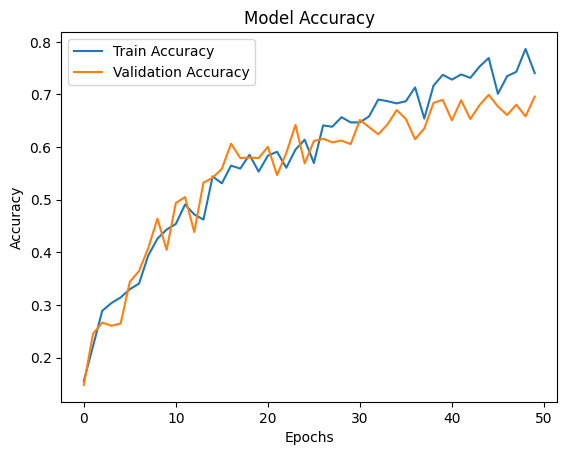

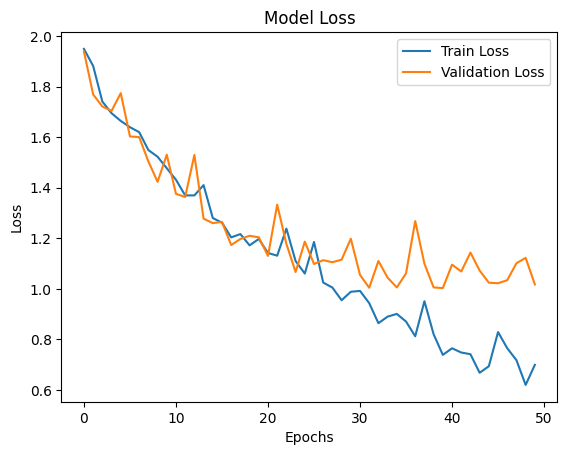

In [211]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 292ms/step


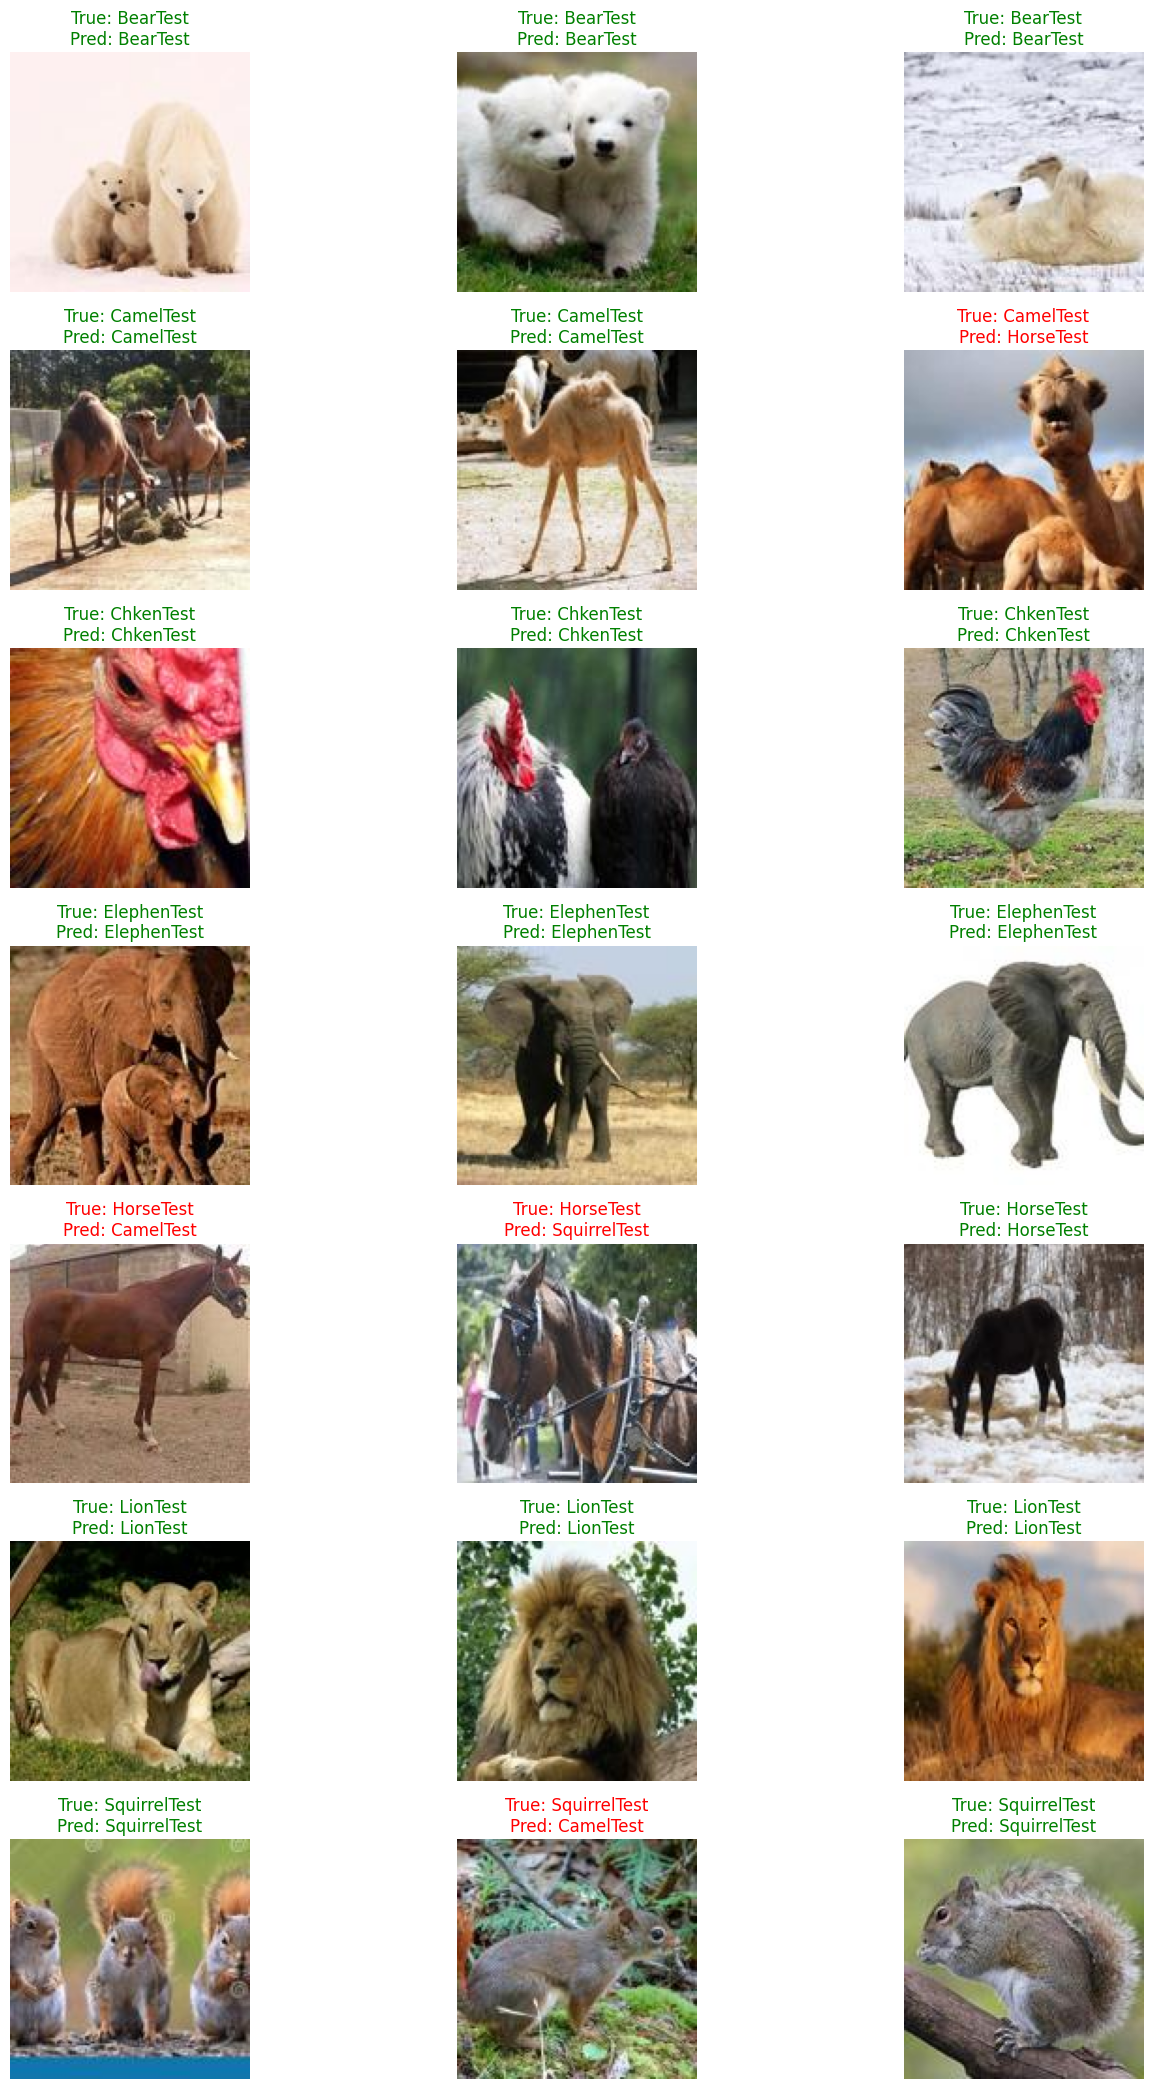

In [212]:
import numpy as np
import matplotlib.pyplot as plt

# Get all the data from the test generator
test_images, test_labels = [], []
for i in range(len(test_generator)):
    img_batch, label_batch = test_generator[i]  # Get each batch of images and labels
    test_images.extend(img_batch)  # Add all images from the batch
    test_labels.extend(label_batch)  # Add all labels from the batch

test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Predict on all test images
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)  # Predicted class indices
true_classes = np.argmax(test_labels, axis=1)  # True class indices
class_labels = list(test_generator.class_indices.keys())  # Class labels

# Visualize predictions for each class
plt.figure(figsize=(15, len(class_labels) * 3))  # Adjust figure size based on the number of classes

for i, class_label in enumerate(class_labels):
    # Get indices for this class
    indices = np.where(true_classes == i)[0]
    
    # Randomly select up to 3 images for each class
    sample_indices = np.random.choice(indices, size=min(3, len(indices)), replace=False)
    
    for j, idx in enumerate(sample_indices):
        img = test_images[idx]  # Get the image data
        true_label = class_label
        predicted_label = class_labels[predicted_classes[idx]]
        
        # Plot the image
        plt.subplot(len(class_labels), 3, i * 3 + j + 1)
        plt.imshow(img)
        color = 'green' if true_label == predicted_label else 'red'
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=color)
        plt.axis('off')

plt.tight_layout()
plt.show()


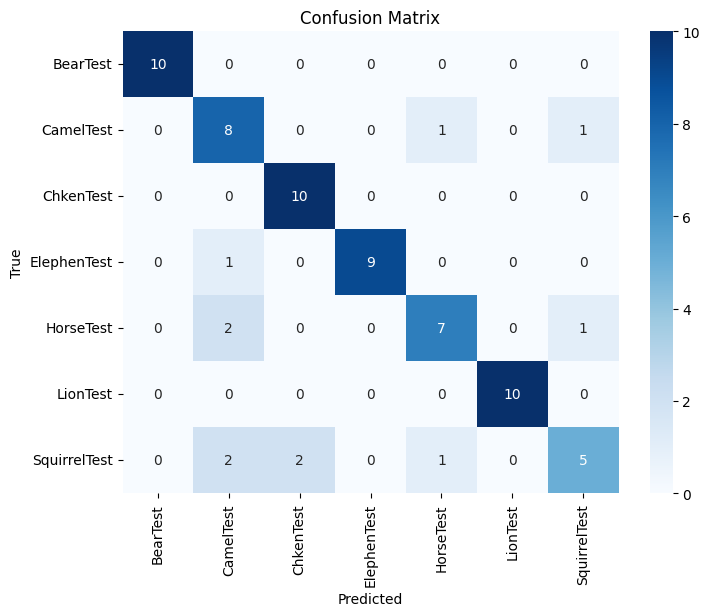

In [213]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')

plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()


In [167]:
model.save('current_model_checkpoint.h5')


In [207]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('current_model_checkpoint.h5')

# Verify the model's architecture
model.summary()

# Optionally, compile the model if you plan to retrain or evaluate it
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_61 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_60 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_62 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_61 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,576,905 (6.02 MB)

 Trainable params: 1,576,903 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [208]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.8667 - loss: 0.4253
Test Loss: 0.5687576532363892, Test Accuracy: 0.8428571224212646


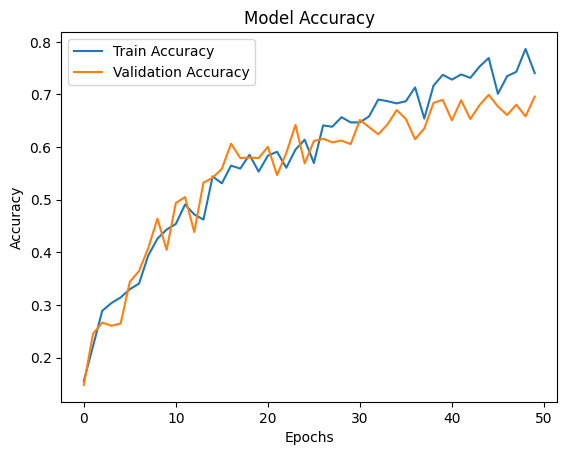

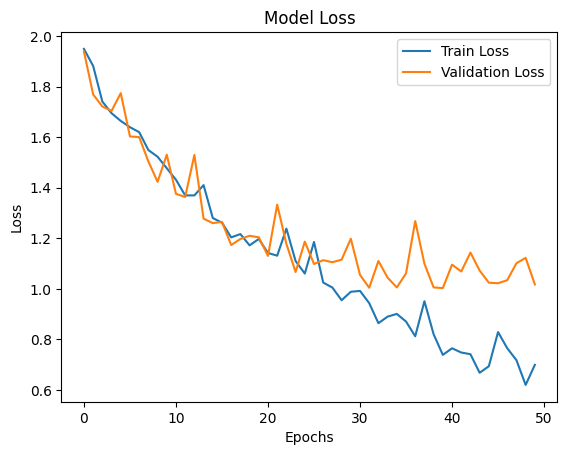

In [210]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


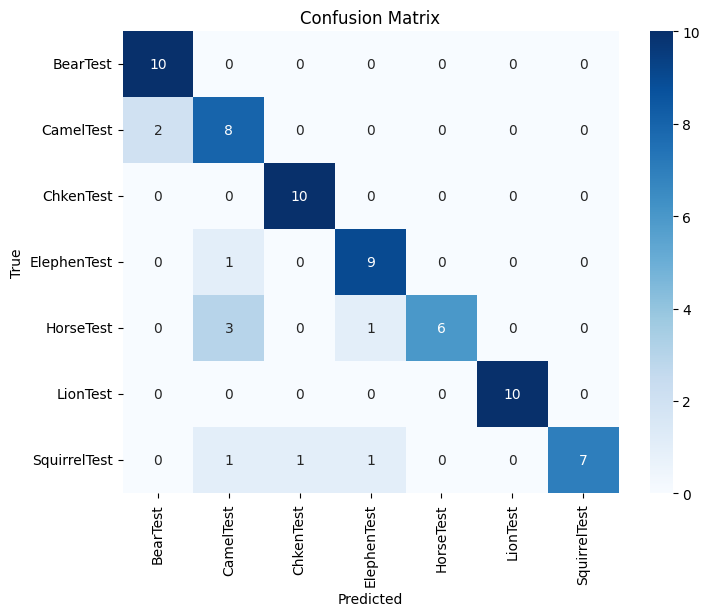

In [209]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')

plt.ylabel('True')
plt.title('Confusion Matrix')

plt.show()